In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#import pandas_profiling
import scipy.stats as stats
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

<Figure size 600x300 with 0 Axes>

In [2]:
from matplotlib.backends.backend_pdf import PdfPages
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV
#Module related to calculation of metrics
from sklearn import metrics
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
#Modules related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression

In [3]:
back=pd.read_csv("Data_of_Attack_Back (1) (1).csv")

In [4]:
back.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.001,0.001,0.1,0,0.100,0,0.0,0.0,0.0,0.0
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.002,0.002,0.1,0,0.050,0,0.0,0.0,0.0,0.0
2,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.003,0.003,0.1,0,0.033,0,0.0,0.0,0.0,0.0
3,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.004,0.004,0.1,0,0.025,0,0.0,0.0,0.0,0.0
4,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.005,0.005,0.1,0,0.020,0,0.0,0.0,0.0,0.0


In [5]:
back['Attack']='back'

In [6]:
back.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.001,0.1,0,0.100,0,0.0,0.0,0.0,0.0,back
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.002,0.1,0,0.050,0,0.0,0.0,0.0,0.0,back
2,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.003,0.1,0,0.033,0,0.0,0.0,0.0,0.0,back
3,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.004,0.1,0,0.025,0,0.0,0.0,0.0,0.0,back
4,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.005,0.1,0,0.020,0,0.0,0.0,0.0,0.0,back


In [7]:
buffer=pd.read_csv("Data_of_Attack_Back_BufferOverflow (1) (1).csv")

In [8]:
buffer.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0184,0,0.05,0.0,0.01511,0.02957,0,0,0,0.3,...,0.001,0.003,0.1,0,0.10,0.067,0,0,0.0,0.0
1,0.0305,0,0.05,0.0,0.01735,0.02766,0,0,0,0.3,...,0.002,0.004,0.1,0,0.05,0.050,0,0,0.0,0.0
2,0.0150,0,0.05,0.0,0.01587,0.06707,0,0,0,0.1,...,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
3,0.0060,0,0.05,0.0,0.02328,0.04551,0,0,0,0.3,...,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
4,0.0158,0,0.05,0.0,0.01567,0.03095,0,0,0,0.3,...,0.002,0.002,0.1,0,0.05,0.000,0,0,0.0,0.0


In [9]:
buffer['Attack']='Buffer'

In [10]:
buffer.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0184,0,0.05,0.0,0.01511,0.02957,0,0,0,0.3,...,0.003,0.1,0,0.10,0.067,0,0,0.0,0.0,Buffer
1,0.0305,0,0.05,0.0,0.01735,0.02766,0,0,0,0.3,...,0.004,0.1,0,0.05,0.050,0,0,0.0,0.0,Buffer
2,0.0150,0,0.05,0.0,0.01587,0.06707,0,0,0,0.1,...,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0,Buffer
3,0.0060,0,0.05,0.0,0.02328,0.04551,0,0,0,0.3,...,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0,Buffer
4,0.0158,0,0.05,0.0,0.01567,0.03095,0,0,0,0.3,...,0.002,0.1,0,0.05,0.000,0,0,0.0,0.0,Buffer


In [11]:
ftp=pd.read_csv("Data_of_Attack_Back_FTPWrite (1) (1).csv")

In [12]:
ftp.head()

,0.0026,0,0.07,0.3,0.00116,0.00451,0.4,0.5,0.6,0.2,...,0.001.2,0.001.3,0.1.5,0.21,0.1.6,0.22,0.23,0.24,0.25,0.26
0,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,...,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0
1,0.0000,0,0.14,0,0.00613,0.00000,0,0,0.0,0.0,...,0.001,0.084,0.10,0.0,0.10,0.002,0,0,0,0
2,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,...,0.002,0.085,0.10,0.0,0.10,0.002,0,0,0,0
3,0.0032,0,0.07,0,0.00104,0.00449,0,0,0.0,0.2,...,0.001,0.001,0.10,0.0,0.10,0.000,0,0,0,0
4,0.0067,0,0.34,0,0.00157,0.02703,0,0,0.1,0.0,...,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0


In [13]:
ftp["Attack"]="FTP"

In [14]:
ftp.rename = pd.DataFrame(ftp)
ftp.columns = ['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack']

In [15]:
ftp.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,...,0.001,0.05,0.1,0.05,0.000,0,0,0,0,FTP
1,0.0000,0,0.14,0,0.00613,0.00000,0,0,0.0,0.0,...,0.084,0.10,0.0,0.10,0.002,0,0,0,0,FTP
2,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,...,0.085,0.10,0.0,0.10,0.002,0,0,0,0,FTP
3,0.0032,0,0.07,0,0.00104,0.00449,0,0,0.0,0.2,...,0.001,0.10,0.0,0.10,0.000,0,0,0,0,FTP
4,0.0067,0,0.34,0,0.00157,0.02703,0,0,0.1,0.0,...,0.001,0.05,0.1,0.05,0.000,0,0,0,0,FTP


In [16]:
guess_pass=pd.read_csv('Data_of_Attack_Back_GuessPassword (1).csv')

In [17]:
guess_pass.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0023,0,0.05,0.00,0.00104,0.00276,0,0,0,0.0,...,0.001,0.002,0.1,0,0.100,0.1,0.000,0.000,0.000,0.000
1,0.0060,0,0.05,0.03,0.00125,0.00179,0,0,0,0.1,...,0.001,0.001,0.1,0,0.100,0.0,0.100,0.100,0.000,0.000
2,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.002,0.002,0.1,0,0.050,0.0,0.050,0.050,0.050,0.050
3,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.003,0.003,0.1,0,0.033,0.0,0.033,0.033,0.067,0.067
4,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.004,0.004,0.1,0,0.025,0.0,0.025,0.025,0.075,0.075


In [18]:
guess_pass['Attack']="guess_pass"

In [19]:
guess_pass.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0023,0,0.05,0.00,0.00104,0.00276,0,0,0,0.0,...,0.002,0.1,0,0.100,0.1,0.000,0.000,0.000,0.000,guess_pass
1,0.0060,0,0.05,0.03,0.00125,0.00179,0,0,0,0.1,...,0.001,0.1,0,0.100,0.0,0.100,0.100,0.000,0.000,guess_pass
2,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.002,0.1,0,0.050,0.0,0.050,0.050,0.050,0.050,guess_pass
3,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.003,0.1,0,0.033,0.0,0.033,0.033,0.067,0.067,guess_pass
4,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.004,0.1,0,0.025,0.0,0.025,0.025,0.075,0.075,guess_pass


In [20]:
neptune=pd.read_csv('Data_of_Attack_Back_Neptune (1).csv')

In [21]:
neptune['Attack']='neptune'

In [22]:
neptune.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.002,0.1,0.0,0.100,0.100,0.1,0.050,0.0,0.0,neptune
1,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.003,0.1,0.0,0.050,0.067,0.1,0.067,0.0,0.0,neptune
2,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.004,0.1,0.0,0.033,0.050,0.1,0.075,0.0,0.0,neptune
3,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.005,0.1,0.0,0.025,0.040,0.1,0.080,0.0,0.0,neptune
4,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.006,0.1,0.0,0.020,0.033,0.1,0.083,0.0,0.0,neptune


In [23]:
nmap=pd.read_csv('Data_of_Attack_Back_NMap.csv')

In [24]:
nmap.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.003,0.001,0.033,0.100,0.033,0.0,0.0,0.0,0,0
1,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.004,0.002,0.050,0.075,0.050,0.0,0.0,0.0,0,0
2,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.005,0.003,0.060,0.060,0.060,0.0,0.0,0.0,0,0
3,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.006,0.004,0.067,0.050,0.067,0.0,0.0,0.0,0,0
4,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.007,0.005,0.071,0.043,0.071,0.0,0.0,0.0,0,0


In [25]:
nmap['Attack']="Nmap"

In [26]:
nmap.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.001,0.033,0.100,0.033,0.0,0.0,0.0,0,0,Nmap
1,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.002,0.050,0.075,0.050,0.0,0.0,0.0,0,0,Nmap
2,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.003,0.060,0.060,0.060,0.0,0.0,0.0,0,0,Nmap
3,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.004,0.067,0.050,0.067,0.0,0.0,0.0,0,0,Nmap
4,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.005,0.071,0.043,0.071,0.0,0.0,0.0,0,0,Nmap


In [27]:
normal=pd.read_csv("Data_of_Attack_Back_Normal.csv")

In [28]:
normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,...,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,...,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,...,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,...,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0


In [29]:
normal['Attack']="normal"

In [30]:
normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,normal
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,normal


In [31]:
portsweep=pd.read_csv('Data_of_Attack_Back_PortSweep.csv')

In [32]:
portsweep.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0000,0.0,0.14,0.05,0.0,0.0,0,0,0,0.0,...,0.171,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.029,0.002
1,0.0001,0.0,0.14,0.08,0.0,0.0,0,0,0,0.0,...,0.172,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.030,0.003
2,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.173,0.001,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100
3,0.0001,0.0,0.12,0.08,0.0,0.0,0,0,0,0.0,...,0.174,0.002,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100
4,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.175,0.001,0.001,0.003,0.003,0.000,0.001,0.0,0.031,0.100


In [33]:
portsweep.shape

(2964, 41)

In [34]:

portsweep['Attack']="portsweep"

In [35]:
portsweep.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0000,0.0,0.14,0.05,0.0,0.0,0,0,0,0.0,...,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.029,0.002,portsweep
1,0.0001,0.0,0.14,0.08,0.0,0.0,0,0,0,0.0,...,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.030,0.003,portsweep
2,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.001,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100,portsweep
3,0.0001,0.0,0.12,0.08,0.0,0.0,0,0,0,0.0,...,0.002,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100,portsweep
4,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.001,0.001,0.003,0.003,0.000,0.001,0.0,0.031,0.100,portsweep


In [36]:
rootkit=pd.read_csv('Data_of_Attack_Back_RootKit.csv')

In [37]:
rootkit.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0060,0.0,0.05,0,0.00086,0.00183,0,0,0.0,0.0,...,0.255,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0
1,0.0060,0.0,0.05,0,0.00090,0.00233,0,0,0.0,0.0,...,0.255,0.002,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0
2,0.0708,0.0,0.05,0,0.01727,0.24080,0,0,0.0,0.0,...,0.255,0.003,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0
3,0.0021,0.0,0.07,0,0.00089,0.00345,0,0,0.0,0.1,...,0.255,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0
4,0.0098,0.0,0.05,0,0.00621,0.08356,0,0,0.1,0.1,...,0.255,0.004,0.002,0.002,0.0,0.0,0,0.0,0.0,0.0


In [38]:
rootkit['Attack']='rootkit'

In [39]:
rootkit.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0060,0.0,0.05,0,0.00086,0.00183,0,0,0.0,0.0,...,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0,rootkit
1,0.0060,0.0,0.05,0,0.00090,0.00233,0,0,0.0,0.0,...,0.002,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0,rootkit
2,0.0708,0.0,0.05,0,0.01727,0.24080,0,0,0.0,0.0,...,0.003,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0,rootkit
3,0.0021,0.0,0.07,0,0.00089,0.00345,0,0,0.0,0.1,...,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0,rootkit
4,0.0098,0.0,0.05,0,0.00621,0.08356,0,0,0.1,0.1,...,0.004,0.002,0.002,0.0,0.0,0,0.0,0.0,0.0,rootkit


In [40]:
satan=pd.read_csv("Data_of_Attack_Back_Satan.csv")

In [41]:
satan.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.143,0.001,0.001,0.004,0.001,0.0,0.001,0.0,0.0,0.0
1,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.144,0.002,0.001,0.004,0.002,0.0,0.001,0.0,0.0,0.0
2,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.145,0.003,0.002,0.004,0.003,0.0,0.001,0.0,0.0,0.0
3,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,...,0.146,0.001,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0
4,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,...,0.147,0.002,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0


In [42]:
satan['Attack']="satan"

In [43]:
satan.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.001,0.001,0.004,0.001,0.0,0.001,0.0,0.0,0.0,satan
1,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.002,0.001,0.004,0.002,0.0,0.001,0.0,0.0,0.0,satan
2,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.003,0.002,0.004,0.003,0.0,0.001,0.0,0.0,0.0,satan
3,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,...,0.001,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0,satan
4,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,...,0.002,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0,satan


In [44]:
smurf=pd.read_csv("Data_of_Attack_Back_Smurf.csv")

In [45]:
smurf.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.146,0.001,0.001,0.002,0.001,0,0.0,0,0.0,0
1,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.147,0.002,0.001,0.002,0.001,0,0.0,0,0.0,0
2,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.148,0.003,0.002,0.002,0.002,0,0.0,0,0.0,0
3,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.149,0.004,0.003,0.002,0.003,0,0.0,0,0.0,0
4,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.150,0.005,0.003,0.002,0.003,0,0.0,0,0.0,0


In [46]:
smurf['Attack']="smurf"

In [47]:
smurf.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.001,0.001,0.002,0.001,0,0.0,0,0.0,0,smurf
1,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.002,0.001,0.002,0.001,0,0.0,0,0.0,0,smurf
2,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.003,0.002,0.002,0.002,0,0.0,0,0.0,0,smurf
3,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.004,0.003,0.002,0.003,0,0.0,0,0.0,0,smurf
4,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.005,0.003,0.002,0.003,0,0.0,0,0.0,0,smurf


In [48]:
data=pd.concat([back,buffer,ftp,guess_pass,neptune,nmap,normal,portsweep,rootkit,satan,smurf], axis = 0)

In [49]:
#checking the variables for naming convencsion 
data.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [50]:
#naming the variables as per the naming convencion 
data.columns=[i.replace(" ","") for i in data.columns]

In [51]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,back
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,back
2,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,back
3,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,back
4,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,back


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817550 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817550 non-null  float64
 1   protocol_type                817550 non-null  float64
 2   service                      817550 non-null  float64
 3   flag                         817550 non-null  float64
 4   src_bytes                    817550 non-null  float64
 5   dst_bytes                    817550 non-null  float64
 6   land                         817550 non-null  int64  
 7   wrong_fragment               817550 non-null  float64
 8   urgent                       817550 non-null  float64
 9   hot                          817550 non-null  float64
 10  num_failed_logins            817550 non-null  float64
 11  logged_in                    817550 non-null  float64
 12  num_compromised              817550 non-null  float64
 13  root_s

In [53]:
# clm=['back','buffer','ftp','guess_pass','neptune','nmap','normal','portsweep','rootkit','satan','smurf']
# for i in clm:
#     print(i.shape)

In [54]:
data.shape

(817550, 42)

In [55]:
#checking the no of unique vlaues in attack column
data["Attack"].nunique()

11

In [56]:
#checking if the data is balanced or not 
data["Attack"].value_counts()

Attack
normal        576710
neptune       227228
satan           5019
smurf           3007
portsweep       2964
Nmap            1554
back             968
guess_pass        53
Buffer            30
rootkit           10
FTP                7
Name: count, dtype: int64

<Axes: xlabel='Attack'>

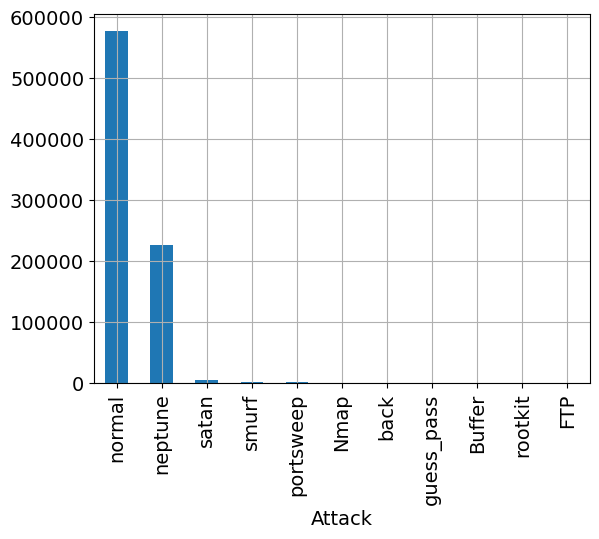

In [57]:
data["Attack"].value_counts().plot(kind="bar")

In [58]:
#Using pandas groupby, separate the datasets into groups based on their attacks and random sample from each group based on population proportion. The total sample size is 60%(0.6) of the population
sample = data.groupby('Attack', group_keys=False).apply(lambda x: x.sample(frac=0.6))

In [59]:
sample.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
27,0.0176,0.0,0.05,0.00,0.01559,0.02732,0,0.0,0.0,0.3,...,0.008,0.1,0.0,0.012,0.0,0.0,0.0,0.012,0.012,Buffer
2,0.0150,0.0,0.05,0.00,0.01587,0.06707,0,0.0,0.0,0.1,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.000,0.000,Buffer
25,0.0321,0.0,0.05,0.06,0.01506,0.01887,0,0.0,0.0,0.0,...,0.006,0.1,0.0,0.017,0.0,0.0,0.0,0.017,0.017,Buffer
29,0.0047,0.0,0.05,0.00,0.02402,0.03816,0,0.0,0.0,0.3,...,0.010,0.1,0.0,0.010,0.0,0.0,0.0,0.010,0.010,Buffer
5,0.0113,0.0,0.05,0.00,0.06274,0.16771,0,0.0,0.0,0.5,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.000,0.000,Buffer


In [60]:
sample.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
589,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.0,0.000,0.0,0.000,0.0,smurf
1798,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.061,0.039,0.005,0.039,0.0,0.001,0.0,0.041,0.0,smurf
553,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.0,0.000,0.0,0.000,0.0,smurf
701,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.0,0.000,0.0,0.000,0.0,smurf
2928,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.177,0.069,0.001,0.069,0.0,0.000,0.0,0.000,0.0,smurf


In [61]:
#checking the shape of our sample dataset
sample.shape

(490529, 42)

In [62]:
#Checking the proportions of the cyber attacks in the sample dataset.
((sample['Attack'].value_counts()) / len(sample) * 100).round(2)

Attack
normal        70.54
neptune       27.79
satan          0.61
smurf          0.37
portsweep      0.36
Nmap           0.19
back           0.12
guess_pass     0.01
Buffer         0.00
rootkit        0.00
FTP            0.00
Name: count, dtype: float64

In [63]:
#checking the proportions of the c yber attacks in the main dataset 
((data['Attack'].value_counts()) / len(sample) * 100).round(2)

Attack
normal        117.57
neptune        46.32
satan           1.02
smurf           0.61
portsweep       0.60
Nmap            0.32
back            0.20
guess_pass      0.01
Buffer          0.01
rootkit         0.00
FTP             0.00
Name: count, dtype: float64

In [64]:
d1=sample.copy()

In [65]:
sample["Attack"]=np.where(sample["Attack"]=='normal',0,1)

In [66]:
sample["Attack"].value_counts()

Attack
0    346026
1    144503
Name: count, dtype: int64

In [67]:
sample.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
27,0.0176,0.0,0.05,0.00,0.01559,0.02732,0,0.0,0.0,0.3,...,0.008,0.1,0.0,0.012,0.0,0.0,0.0,0.012,0.012,1
2,0.0150,0.0,0.05,0.00,0.01587,0.06707,0,0.0,0.0,0.1,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.000,0.000,1
25,0.0321,0.0,0.05,0.06,0.01506,0.01887,0,0.0,0.0,0.0,...,0.006,0.1,0.0,0.017,0.0,0.0,0.0,0.017,0.017,1
29,0.0047,0.0,0.05,0.00,0.02402,0.03816,0,0.0,0.0,0.3,...,0.010,0.1,0.0,0.010,0.0,0.0,0.0,0.010,0.010,1
5,0.0113,0.0,0.05,0.00,0.06274,0.16771,0,0.0,0.0,0.5,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.000,0.000,1


<Axes: xlabel='Attack'>

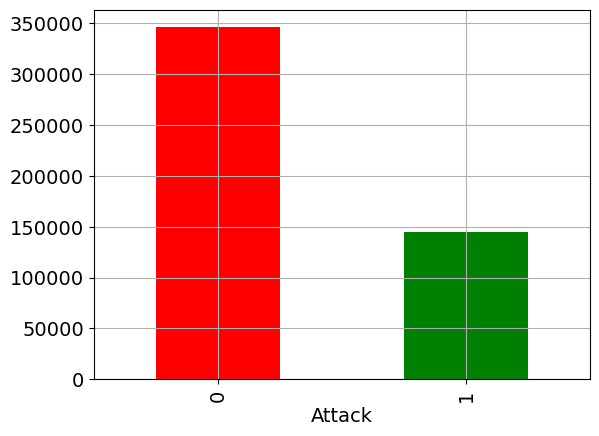

In [68]:
sample["Attack"].value_counts().plot(kind="bar",color=["red","green"])

# Balancing an unbalanced dataset

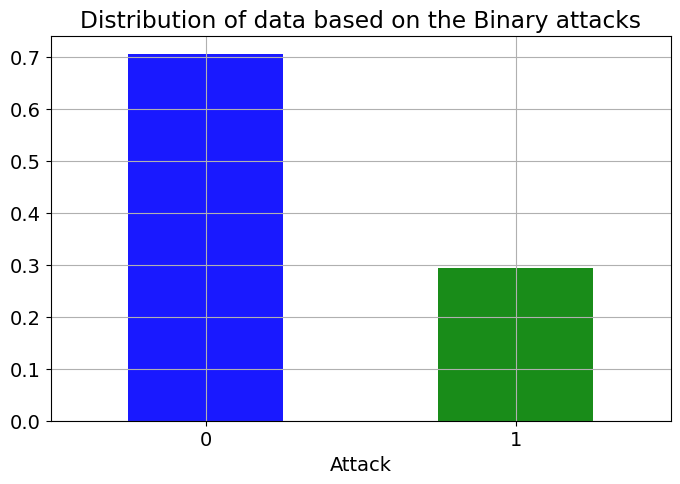

In [69]:
fig = plt.figure(figsize = (8,5))
sample.Attack.value_counts(normalize = True).plot(kind='bar', color= ['blue','green'], alpha = 0.9, rot=0)
plt.title('Distribution of data based on the Binary attacks')
plt.show()

In [70]:
#So, we can do Undersampling technique to balance the datasets otherwise As you can see, this model is only predicting 0, which means it’s completely ignoring the minority class in favor of the majority class.
df_majority = sample[sample.Attack == 0]
df_minority = sample[sample.Attack == 1]

In [71]:
df_majority_undersample = df_majority.sample(replace = False, n = 144503, random_state = 123)#random_state it's won't shuffle if we run this multiple time 

In [72]:
#for over sample we can use this code 
#df_minority_oversample = df_minority.sample(replace = True, n = 346026, random_state = 123)#random_state it's won't shuffle if we run this multiple time 

In [73]:
b_sample = pd.concat([df_majority_undersample, df_minority])
print(b_sample.Attack.value_counts())
b_sample.shape

Attack
0    144503
1    144503
Name: count, dtype: int64


(289006, 42)

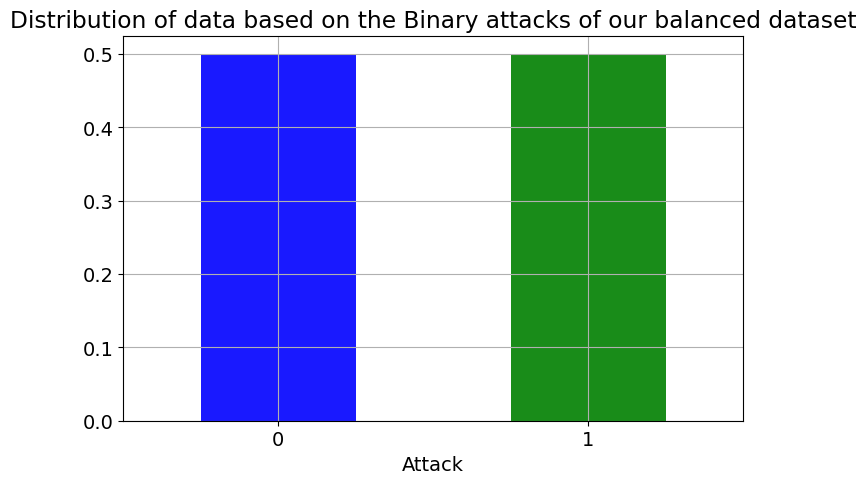

In [74]:
fig = plt.figure(figsize = (8,5))
b_sample.Attack.value_counts(normalize = True).plot(kind='bar', color= ['blue','green'], alpha = 0.9, rot=0)
plt.title('Distribution of data based on the Binary attacks of our balanced dataset')
plt.show()

##### Our dataset was highly unbalance 70% is normal 30% of attckers so we used under sampling technique to make the dataset balanced.Now, our datset is balanced.Now we are ready with our EDA Process.

In [75]:
#checking the null values 
sample.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [76]:
#checking the duplicate values 
b_sample.duplicated().sum()

0

In [77]:
#removing the duplicate value from our dataset 
b_sample.drop_duplicates(inplace=True)

In [78]:
#checking our statistical data 
b_sample.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
count,289006.000000,289006.000000,289006.000000,289006.000000,289006.000000,289006.000000,289006.0,289006.000000,289006.000000,289006.000000,...,289006.000000,289006.000000,289006.000000,289006.000000,289006.000000,289006.000000,289006.000000,289006.000000,289006.000000,289006.000000
mean,0.001077,0.000523,0.083751,0.033439,0.004172,0.017687,0.0,0.000001,0.000003,0.001988,...,0.118653,0.049132,0.004924,0.005171,0.001217,0.042069,0.042115,0.007542,0.007495,0.500000
std,0.029993,0.002625,0.113044,0.034042,0.033658,0.057191,0.0,0.000558,0.000832,0.035371,...,0.116349,0.046332,0.010053,0.016908,0.003294,0.049208,0.049326,0.025790,0.026135,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.010000,0.004000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.070000,0.000000,0.000070,0.000000,0.0,0.000000,0.000000,0.000000,...,0.028000,0.023000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.120000,0.070000,0.002560,0.011090,0.0,0.000000,0.000000,0.000000,...,0.255000,0.100000,0.007000,0.001000,0.001000,0.100000,0.100000,0.000000,0.000000,1.000000
max,1.000000,0.020000,0.670000,0.100000,1.000000,1.000000,0.0,0.300000,0.300000,1.000000,...,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,1.000000


In [79]:
b_sample

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
34612,0.0,0.00,0.00,0.0,0.00294,0.01718,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.001,0.004,0.000,0.000,0.000,0.0,0
500510,0.0,0.00,0.00,0.0,0.00216,0.00181,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0
416196,0.0,0.00,0.00,0.0,0.00291,0.03355,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.004,0.005,0.000,0.000,0.000,0.0,0
190634,0.0,0.00,0.00,0.0,0.00220,0.02475,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.001,0.003,0.000,0.000,0.000,0.0,0
484163,0.0,0.00,0.00,0.0,0.00287,0.01178,0,0.0,0.0,0.0,...,0.059,0.100,0.000,0.002,0.003,0.002,0.002,0.000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.000,0.000,0.000,0.000,0.0,1
1798,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.061,0.039,0.005,0.039,0.000,0.001,0.000,0.041,0.0,1
553,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.000,0.000,0.000,0.000,0.0,1
701,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.000,0.000,0.000,0.000,0.0,1


In [80]:
b_sample.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
589,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.0,0.000,0.0,0.000,0.0,1
1798,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.061,0.039,0.005,0.039,0.0,0.001,0.0,0.041,0.0,1
553,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.0,0.000,0.0,0.000,0.0,1
701,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.0,0.000,0.0,0.000,0.0,1
2928,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.177,0.069,0.001,0.069,0.0,0.000,0.0,0.000,0.0,1


# Feature Engineering 

#### Correlation analysis 

In [90]:

correlation=b_sample.corrwith(b_sample.Attack).abs().sort_values(ascending=False)
co_d=pd.DataFrame(correlation)

In [91]:
co_d

,0
Attack,1.000000
same_srv_rate,0.956730
flag,0.949527
dst_host_same_srv_rate,0.928298
logged_in,0.902797
dst_host_srv_count,0.898928
dst_host_srv_serror_rate,0.852248
srv_error_rate,0.851603
dst_host_serror_rate,0.851274
serror_rate,0.850940


##### We moving out with the 30% of cut of and we are going to delete all the variable where ever the relation is more than 30%

In [ ]:
#creating a copy of our sample dataset
cutoff_data=

In [ ]:
#deleting the varibales where having the relation with t he y variable is more than 30%


In [82]:
b_sample.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [84]:
#cheking problematic variables which are not showing no correlation with variable (mass variable reduction technique)
b_sample["land"]

34612     0
500510    0
416196    0
190634    0
484163    0
         ..
589       0
1798      0
553       0
701       0
2928      0
Name: land, Length: 289006, dtype: int64

In [86]:
b_sample["land"].value_counts()

land
0    289006
Name: count, dtype: int64

In [ ]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (60, 32))
sns.heatmap(b_sample.corr().abs(),annot=True, cmap='coolwarm')
plt.show()

In [ ]:
clmn=['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack']
for i in clmn:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(x=b_sample[i])
    plt.title(i)
    plt.show()